## Συναρτήσεις και μέθοδοι

Παράδειγμα δημιουργίας συναρτήσεων σε μια γραμμή (one liners):

In [1]:
f(x) = x^x^x

f (generic function with 1 method)

Υπολογισμός τιμών

In [2]:
x = LinRange(0, 2, 101)

101-element LinRange{Float64, Int64}:
 0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, …, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0

In [3]:
map(f,x)

101-element Vector{Float64}:
  0.0
  0.02684670673224605
  0.05901278165011742
  0.09288300365187224
  0.12699091019320535
  0.16057272043212115
  0.19321314594459593
  0.22469248319955581
  0.2549073511465989
  0.2838255550319414
  0.31145890709837815
  0.3378462681202289
  0.36304272105277535
  ⋮
  4.999223357809998
  5.436892757004595
  5.935162990905068
  6.504701995337934
  7.1584350798221585
  7.912100808255167
  8.78496275620346
  9.800726171574185
 10.988725666973842
 12.385473731845078
 14.036692816285075
 16.0

In [4]:
x = LinRange(0, 2, 101) # 101 τιμές με αρχική το 0 και τελική το 101
y = map(f, x)

[vcat(x) y]

101×2 Matrix{Float64}:
 0.0    0.0
 0.02   0.0268467
 0.04   0.0590128
 0.06   0.092883
 0.08   0.126991
 0.1    0.160573
 0.12   0.193213
 0.14   0.224692
 0.16   0.254907
 0.18   0.283826
 0.2    0.311459
 0.22   0.337846
 0.24   0.363043
 ⋮     
 1.78   4.99922
 1.8    5.43689
 1.82   5.93516
 1.84   6.5047
 1.86   7.15844
 1.88   7.9121
 1.9    8.78496
 1.92   9.80073
 1.94  10.9887
 1.96  12.3855
 1.98  14.0367
 2.0   16.0

In [5]:
[x y]

101×2 Matrix{Float64}:
 0.0    0.0
 0.02   0.0268467
 0.04   0.0590128
 0.06   0.092883
 0.08   0.126991
 0.1    0.160573
 0.12   0.193213
 0.14   0.224692
 0.16   0.254907
 0.18   0.283826
 0.2    0.311459
 0.22   0.337846
 0.24   0.363043
 ⋮     
 1.78   4.99922
 1.8    5.43689
 1.82   5.93516
 1.84   6.5047
 1.86   7.15844
 1.88   7.9121
 1.9    8.78496
 1.92   9.80073
 1.94  10.9887
 1.96  12.3855
 1.98  14.0367
 2.0   16.0

In [6]:
y = f.(x);

In [7]:
using PyPlot

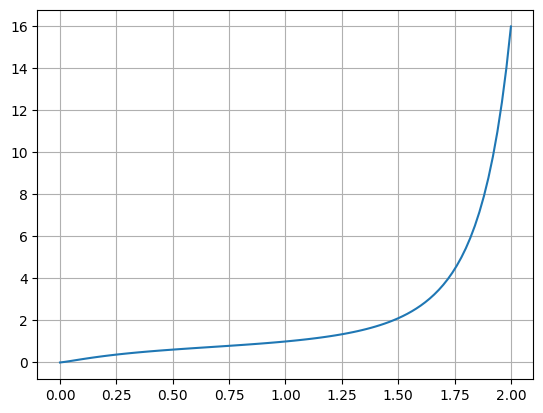

In [8]:
plot(x, y)
grid(true)

Οι συναρτήσεις μπορεί να δέχονται πολλές παραμέτρους και να επιστρέφουν επίσης πολλές παραμέτρους. 

In [9]:
f(x, y) = cos(x)*sin(y)

f (generic function with 2 methods)

In [10]:
@which f(1.,3.)

f(x, y)
     @ Main In[9]:1

Παρακάτω ορίζουμε μια συνάρτηση $meshgrid(x, y)$ που δέχεται ως είσοδο δύο μεταβλητές τύπου Vector $x$ και $y$ και επιστέφει δύο μεταβλητές $X$, $Y$ τύπου Matrix με τις συντεταγμένες του ομοιόμορφου πλέγματος των σημείων από όλους τους συνδυασμούς των $x$ και $y$ τιμών. Η συνάρτηση meshgrid συμπεριφέρεται όπως η αντίστοιχη του MatLab αλλά εδώ γράφεται σε μια γραμμή...

In [11]:

meshgrid(x, y) = ([x for _ in y, x in x], [y for y in y, _ in x])

meshgrid (generic function with 1 method)

Παραπάνω η δομή ```result = [expression for element = iterable]``` ονομάζεται **array comprehension** και είναι χοντρικά ισοδύναμη με την δομη:
```
result = []
for element in iterable
    push!(result, expression)
end
```

Π.χ.:

In [12]:
a = [1,2,3]

[x^2 for x in a] # 

3-element Vector{Int64}:
 1
 4
 9

####  Πολυδιάστατα array comprehensions
```
result = [expression for a = iterable_a, b = iterable_b]
```
<==>
```
result = []
for a = iterable_a
    for b = iterable_b
        push!(result, expression)
    end
end
```

In [13]:
[x^2 + y for y in range(0,3), x in a]

4×3 Matrix{Int64}:
 1  4   9
 2  5  10
 3  6  11
 4  7  12

In [14]:
[x^2 + y for y in range(0,3) for x in a]

12-element Vector{Int64}:
  1
  4
  9
  2
  5
 10
  3
  6
 11
  4
  7
 12

In [15]:
reshape([x^2 + y for y in range(0,3) for x in a], (3,4))

3×4 Matrix{Int64}:
 1   2   3   4
 4   5   6   7
 9  10  11  12

In [16]:
x = LinRange(0, 8π, 401)
y = LinRange(0, 8π, 401)

X, Y = meshgrid(x, y)

Z = f.(X, Y)

401×401 Matrix{Float64}:
  0.0           0.0           0.0          …   0.0           0.0
  0.0627905     0.0626666     0.0622954        0.0626666     0.0627905
  0.125333      0.125086      0.124345         0.125086      0.125333
  0.187381      0.187012      0.185904         0.187012      0.187381
  0.24869       0.248199      0.246729         0.248199      0.24869
  0.309017      0.308407      0.30658      …   0.308407      0.309017
  0.368125      0.367398      0.365222         0.367398      0.368125
  0.425779      0.424939      0.422422         0.424939      0.425779
  0.481754      0.480803      0.477955         0.480803      0.481754
  0.535827      0.534769      0.531602         0.534769      0.535827
  0.587785      0.586625      0.58315      …   0.586625      0.587785
  0.637424      0.636166      0.632398         0.636166      0.637424
  0.684547      0.683196      0.679149         0.683196      0.684547
  ⋮                                        ⋱                 ⋮
 -0.637

In [17]:
Y

401×401 Matrix{Float64}:
  0.0         0.0         0.0        …   0.0         0.0         0.0
  0.0628319   0.0628319   0.0628319      0.0628319   0.0628319   0.0628319
  0.125664    0.125664    0.125664       0.125664    0.125664    0.125664
  0.188496    0.188496    0.188496       0.188496    0.188496    0.188496
  0.251327    0.251327    0.251327       0.251327    0.251327    0.251327
  0.314159    0.314159    0.314159   …   0.314159    0.314159    0.314159
  0.376991    0.376991    0.376991       0.376991    0.376991    0.376991
  0.439823    0.439823    0.439823       0.439823    0.439823    0.439823
  0.502655    0.502655    0.502655       0.502655    0.502655    0.502655
  0.565487    0.565487    0.565487       0.565487    0.565487    0.565487
  0.628319    0.628319    0.628319   …   0.628319    0.628319    0.628319
  0.69115     0.69115     0.69115        0.69115     0.69115     0.69115
  0.753982    0.753982    0.753982       0.753982    0.753982    0.753982
  ⋮               

Παρακάτω μπορείτε να δείτε και το αντίστοιχο γράφημα:


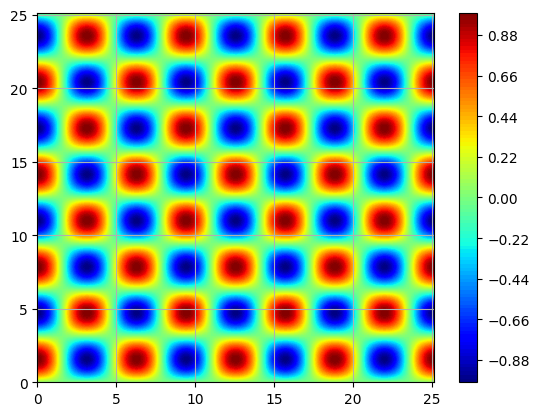

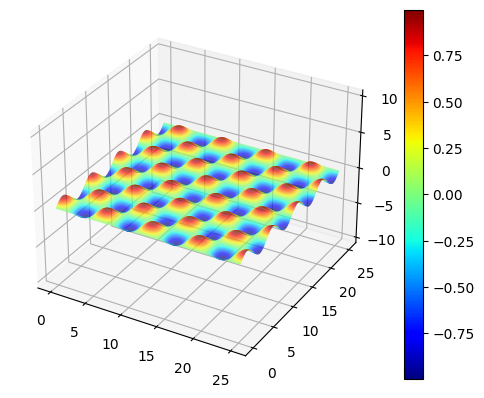

In [18]:
#| eval: true
using PyPlot

figure()
cntr = contourf(x, y, Z, cmap="jet", levels=100)
grid(true)
colorbar(cntr)

figure()
srf = plot_surface(x, y, Z, rstride=1, cstride=1, alpha=1., cmap="jet")
colorbar(srf)
grid(true)
axis("equal");

Για συναρτήσεις με περισσότερες πράξεις χρησιμοποιούμε δομές όπως τα παρακάτω παραδείγματα. 

Vectorized παράδειγμα με τη λογική του MatLab:


In [19]:
function Ω(r::Vector{T}, θ::Vector{T}) where T <: Number # Στην συνάρτηση το T είναι παράμετρος που αντιστοιχεί στον τύπο δεδομένων των Vectors.

    R = [ri for _ in θ, ri in r]
    Θ = [θi for θi in θ, _ in r]
  
    Z = @. R*exp(1im*Θ)

    W =@. 2*log(Z)/(2π)

    Φ = real(W)
    Ψ = imag(W)

    Z, W, Φ, Ψ

end

Ω (generic function with 1 method)

Μια πιο αποδοτική έκδοση όπου οι μεταβλητές εισόδου είναι ranges:


In [20]:
#| eval: true
function Ω(r::AbstractRange{T}, θ::AbstractRange{T}) where T <: Number

    Z = Matrix{Complex{T}}(undef, length(θ), length(r))
    W = Matrix{Complex{T}}(undef, length(θ), length(r))
    Φ = Matrix{T}(undef, length(θ), length(r))
    
    Ψ = similar(Φ)

    for (j, rj) in enumerate(r)
        for (i, θi) in enumerate(θ)        
            Z[i, j] = rj*exp(1im*θi)
            W[i, j] = 2*log(Z[i, j] )/(2π)
            Φ[i, j] = real(W[i, j])
            Ψ[i, j] = imag(W[i, j])
        end
    end

    Z, W, Φ, Ψ    

end

Ω (generic function with 2 methods)

In [21]:
#| eval: true
r = LinRange(0.001, 1, 201)
θ = LinRange(-π, π, 201)

Z1, W1, Φ1, Ψ1 = Ω(r, θ)

X1 = real(Z1)
Y1 = imag(Z1)

minΦ = minimum(Φ1)
maxΦ = maximum(Φ1)

levelsΦ = vcat(LinRange(minΦ, maxΦ-(maxΦ-minΦ)/1000, 20));
# deleteat!(levelsΦ, findall(x -> abs(x)<0.08, levelsΨ)) 

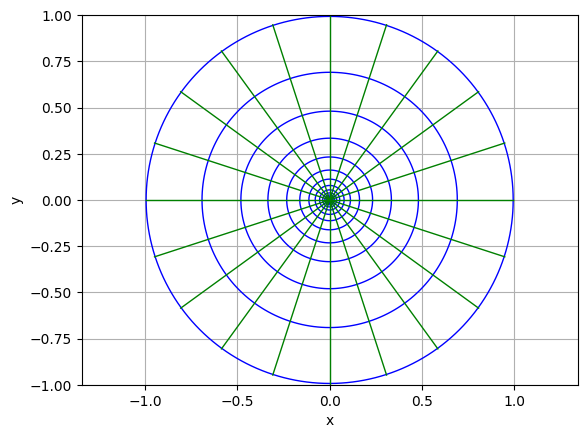

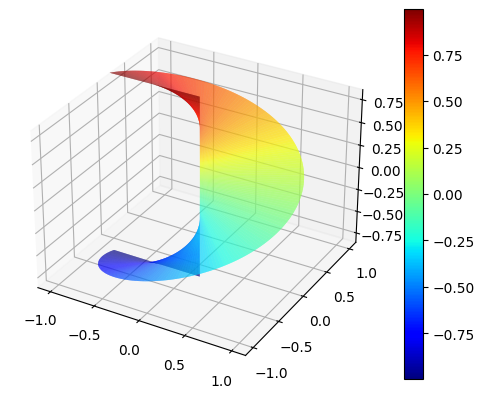

In [22]:
using PyPlot

figure()
cntr = contour(X1, Y1, Φ1, colors = "blue", levels = levelsΦ, linewidths = 1., linestyles = "solid")
cntr = contour(X1, Y1, Ψ1 ,colors = "green", levels = 20,  linewidths = 1., linestyles = "solid")
xlabel("x")
ylabel("y")

axis("equal")
grid(true)

figure()
srf = plot_surface(X1, Y1, Ψ1 , rstride=1, cstride=1, alpha=1., cmap="jet")
colorbar(srf)
grid(true)
axis("equal");

### Optional Arguments

In [23]:
function fu(x,y,z=3)
    x+y+z
end

fu (generic function with 2 methods)

In [24]:
fu(1,1)

5

In [25]:
fu(1,1,5)

7

### Keyword Arguments


In [26]:
function g(x,y,z;a=3,b=6,c=4)
    a*x+b*y+c*z
end

g (generic function with 1 method)

In [27]:
g(2,3,4)

40

In [28]:
g(2,3,4,c=1)

28

In [29]:
g(2,3,4;a=1, c=2)

28

### Μεταβλητός αριθμός ορισμάτων

In [30]:
function vu(y...)
    println("Έδωσες $(length(y)) ορίσματα")

    if length(y)==2
        y[1]*y[2]
    else
        sum(y)
    end

end

vu (generic function with 1 method)

In [31]:
#m = @which vu(1,2,3,4,54)
#Base.delete_method(m)

vu(2,3,5,55,8)

Έδωσες 5 ορίσματα


73

In [32]:
vu(2,3)

Έδωσες 2 ορίσματα


6

### Σύνθεση συναρτήσεων

In [33]:
f₁(x) = x^2   # f₁

f₂(x) = exp(x)

f₂ (generic function with 1 method)

In [34]:
x = LinRange(0,1,10)

x .|> f₂ .|> f₁ 

10-element Vector{Float64}:
 1.0
 1.2488488690016823
 1.5596234976067807
 1.9477340410546757
 2.4324254542872077
 3.037731777517483
 3.7936678946831774
 4.737717859643079
 5.9166935906643285
 7.3890560989306495

In [35]:
y = f₁.(f₂.(x))

10-element Vector{Float64}:
 1.0
 1.2488488690016823
 1.5596234976067807
 1.9477340410546757
 2.4324254542872077
 3.037731777517483
 3.7936678946831774
 4.737717859643079
 5.9166935906643285
 7.3890560989306495

In [36]:
(f₁∘f₂).(x)   

10-element Vector{Float64}:
 1.0
 1.2488488690016823
 1.5596234976067807
 1.9477340410546757
 2.4324254542872077
 3.037731777517483
 3.7936678946831774
 4.737717859643079
 5.9166935906643285
 7.3890560989306495

In [37]:
f₃=f₁∘f₂

f₃.(x)

10-element Vector{Float64}:
 1.0
 1.2488488690016823
 1.5596234976067807
 1.9477340410546757
 2.4324254542872077
 3.037731777517483
 3.7936678946831774
 4.737717859643079
 5.9166935906643285
 7.3890560989306495

In [38]:
f(x::Float64)::Float64 = x^2

f (generic function with 3 methods)

In [39]:
#@code_warntype((f₁∘f₂)(2))

In [40]:
#@code_lowered((f₁∘f₂)(2))

In [41]:
#@code_llvm((f₁∘f₂)(2))

In [42]:
#@code_llvm((f₂∘f₁)(2))

### Αναδρομικές συναρτήσεις

Υλοποίηση σε Julia της μεθόδου που περιγράφεται στη σελίδα: <https://en.wikipedia.org/wiki/Adaptive_Simpson%27s_method>.

In [43]:
function simpleSimpson(f::Function, a::Real, fa::Real, b::Real, fb::Real)
    m = (a + b) / 2.
    fm = f(m)
    m, fm, abs(b - a) / 6 * (fa + 4 * fm + fb)
end

function _adaptiveSimpson(f, a, fa, b, fb, eps, whole, m, fm)
    lm, flm, left  = simpleSimpson(f, a, fa, m, fm)
    rm, frm, right = simpleSimpson(f, m, fm, b, fb)
    delta = left + right - whole
    if abs(delta) <= 15 * eps
        return left + right + delta / 15
    end
    return _adaptiveSimpson(f, a, fa, m, fm, eps/2, left , lm, flm) +
           _adaptiveSimpson(f, m, fm, b, fb, eps/2, right, rm, frm)
end

function adaptiveSimpson(f, a, b, eps)
    fa, fb = f(a), f(b)
    m, fm, whole = simpleSimpson(f, a, fa, b, fb)
    return _adaptiveSimpson(f, a, fa, b, fb, eps, whole, m, fm)
end

adaptiveSimpson (generic function with 1 method)

In [44]:
adaptiveSimpson(sin, 0, 1, 1e-12)

0.45969769413186023

In [45]:
# using Pkg
# Pkg.add("NumericalIntegration")
# Pkg.add("QuadGK")
# Pkg.add("Cubature")
# Pkg.add("FastGaussQuadrature")
# using NumericalIntegration, QuadGK

In [46]:
using NumericalIntegration

x = LinRange(0,1,2001)
integrate(x, sin.(x), SimpsonEven())

0.4596976941318605

In [47]:
using QuadGK

quadgk(sin, 0, 1)

(0.4596976941318603, 5.551115123125783e-17)

In [48]:
using Cubature

hquadrature(sin, 0, 1; abstol=1e-12)

(0.45969769413186023, 5.103669643922839e-15)

In [49]:
using BenchmarkTools

@benchmark adaptiveSimpson(sin, 0, 1, 1e-12)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  37.822 μs …  2.005 ms  ┊ GC (min … max): 0.00% … 96.06%
 Time  (median):     40.216 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   44.256 μs ± 60.998 μs  ┊ GC (mean ± σ):  5.05% ±  3.60%

  ▁ ▆█▇▇▄▂▂▂▁▁   ▁▁▂▂▂▁▁▁                                     ▂
  █████████████████████████▇▇▆▆▆▆▆▆▆▆▆▄▅▆▅▅▄▅▅▅▅▅▅▄▄▅▃▃▄▄▄▄▂▃ █
  37.8 μs      Histogram: log(frequency) by time      70.6 μs <

 Memory estimate: 62.67 KiB, allocs estimate: 3737.

In [50]:
@benchmark quadgk(sin, 0, 1)

BenchmarkTools.Trial: 10000 samples with 969 evaluations.
 Range (min … max):  75.892 ns … 139.977 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     80.225 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   80.694 ns ±   3.128 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

      ▁▁▁ ▂▃▄▇██▇▇▆▅▄▁                                         ▂
  ▄▆▅██████████████████▅▅▆▆█████▆▅▆▅▆▇▇▆▆▇▇▆▆▆▆▅▄▄▅▄▅▄▄▄▁▅▃▁▅▃ █
  75.9 ns       Histogram: log(frequency) by time      95.1 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [51]:
@benchmark hquadrature(sin, 0, 1; abstol=1e-12)

BenchmarkTools.Trial: 10000 samples with 190 evaluations.
 Range (min … max):  527.632 ns …  14.629 μs  ┊ GC (min … max): 0.00% … 94.44%
 Time  (median):     548.989 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   566.010 ns ± 420.563 ns  ┊ GC (mean ± σ):  2.42% ±  3.13%

  ▂▅▆▆▃▂▃▆██▆▄▂▁▂▁     ▁ ▁▂▂▂▂▁▁▁▁                              ▂
  ████████████████▇▇▇▇██████████████▇▇▆▆▆▇▆▆▄▁▃▅▅▄▆▆▄▅▄▁▄▃▃▄▅▃▅ █
  528 ns        Histogram: log(frequency) by time        676 ns <

 Memory estimate: 272 bytes, allocs estimate: 5.

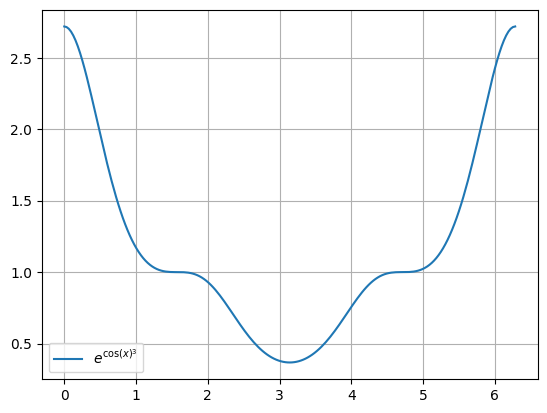

PyObject <matplotlib.legend.Legend object at 0x7fc8a2aa2370>

In [52]:
fnew(x) = exp(cos(x)^3)

using PyPlot

xi = LinRange(0, 2π, 201)
yi = fnew.(xi)

plot(xi, yi, label=L"e^{\cos(x)^3}")
grid(true)
legend()


In [53]:
adaptiveSimpson(fnew, 0, 2π, 1e-12)

7.325635176988653

In [54]:
quadgk(fnew,  0, 2π,)

(7.325635176988653, 8.329792411387871e-11)

In [55]:
hquadrature(fnew, 0, 2π; abstol=1e-11)

(7.325635176988653, 4.304250821875365e-12)

In [56]:
@benchmark adaptiveSimpson(fnew, 0, 2π, 1e-12)

BenchmarkTools.Trial: 3876 samples with 1 evaluation.
 Range (min … max):  1.123 ms …   3.902 ms  ┊ GC (min … max): 0.00% … 67.38%
 Time  (median):     1.203 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.287 ms ± 359.096 μs  ┊ GC (mean ± σ):  5.31% ± 11.29%

  ▃▆█▆▃▂▂▁▁▁                                             ▁    ▁
  ██████████▇▇▆▃▅▁▁▃▁▁▄▃▁▁▁▃▁▁▁▃▁▁▄▁▃▁▃▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▅▇███▇ █
  1.12 ms      Histogram: log(frequency) by time      3.05 ms <

 Memory estimate: 1.65 MiB, allocs estimate: 100861.

In [57]:
@benchmark quadgk(fnew,  0, 2π)

BenchmarkTools.Trial: 10000 samples with 9 evaluations.
 Range (min … max):  2.587 μs …   7.860 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     2.695 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   2.751 μs ± 279.817 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▄█▅▅█▆▅▅▃▂▂▁                                                ▂
  ███████████████▇▇▇▆▅▆▅▅▆▅▇▇▆▆▅▇▆▆▆▄▅▆▆▅▆▆▆▆▆▆▆▇▆▆▅▅▅▆▃▅▆▄▄▆ █
  2.59 μs      Histogram: log(frequency) by time      4.04 μs <

 Memory estimate: 368 bytes, allocs estimate: 2.

In [58]:
@benchmark  hquadrature(fnew, 0, 2; abstol=1e-11)

BenchmarkTools.Trial: 10000 samples with 10 evaluations.
 Range (min … max):  1.825 μs …   5.319 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.906 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.921 μs ± 131.815 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

    ▃▇   █▅                                                    
  ▃▃██▇▄▄███▆▃▃▄▆▅▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▁▂▁▂▁▂▂▂▁▂▂▂▂ ▃
  1.83 μs         Histogram: frequency by time        2.43 μs <

 Memory estimate: 272 bytes, allocs estimate: 5.

### Παράδειγμα: υπολογισμός της rms value των τιμών ενός array

In [59]:
function my_rms(x::Vector{T})  where T <: Real
    s = zero(eltype(x))
    
    @inbounds @simd for xi in x
        s += xi^2
    end

    sqrt(s/length(x))
end

my_rms (generic function with 1 method)

In [60]:
fx(x) = x^2

fx (generic function with 1 method)

In [61]:
mapreduce(x->x^2, +, x)

667.1667500000001

In [62]:
xi = rand(10_000_000);

In [63]:
my_rms(xi)

0.5772458110209425

In [64]:
using BenchmarkTools

In [65]:
@benchmark my_rms($xi)

BenchmarkTools.Trial: 2350 samples with 1 evaluation.
 Range (min … max):  1.795 ms …   3.419 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     2.027 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   2.119 ms ± 280.847 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▁▁▁▂▃██▇▇▆▃▁                                                
  ▅█████████████▇▆▆▅▅▄▄▄▃▄▂▃▄▂▂▃▂▂▂▃▃▂▃▂▂▂▂▂▂▁▂▂▂▁▁▂▁▂▂▁▂▁▁▁▁ ▃
  1.79 ms         Histogram: frequency by time        3.13 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [66]:
# @code_warntype(my_rms(x))

In [67]:
# @code_llvm(my_rms(x))

In [68]:
# my_functional_rms(x) = sqrt(reduce(+, map(x->x^2, x))/length(x))

my_functional_rms(x) = sqrt(mapreduce(x->x^2, +, x)/length(x))

my_functional_rms (generic function with 1 method)

In [69]:
my_functional_rms(xi)

0.5772458110209409

In [70]:
@benchmark my_functional_rms

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.082 ns … 15.830 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.112 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.117 ns ±  0.243 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

                        █           ▁          ▆              
  ▂▂▁▁▁▁▁▁▁▁▁▇▂▁▁▁▁▁▁▁▁▁█▃▁▁▁▁▁▁▁▁▁▁█▃▁▁▁▁▁▁▁▁▁█▄▁▁▁▁▁▁▁▁▁▆▂ ▂
  1.08 ns        Histogram: frequency by time        1.13 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [71]:
# @code_warntype(my_rms_new(x))

In [72]:
# @code_lowered(my_rms_new(x))

In [73]:
# @code_llvm(my_rms_new(x))

In [74]:
# hi=rand(10_000_000);
hi = rand(5)
sort(hi, rev=true)

5-element Vector{Float64}:
 0.8364156734909342
 0.5446808477689602
 0.46241659785176836
 0.38300535258621304
 0.09926884312836004

In [75]:
length(hi) ÷  3



1

In [76]:
function Hs(hi::Vector{T}) where T <: Number

    Ntrita = length(hi)÷3
    reduce(+, sort(hi, rev=true)[1:Ntrita])/Ntrita

end

Hs (generic function with 1 method)

In [77]:

Hs(hi)

0.8364156734909342

In [78]:
@benchmark  Hs($hi)

BenchmarkTools.Trial: 10000 samples with 980 evaluations.
 Range (min … max):  64.091 ns …   3.668 μs  ┊ GC (min … max):  0.00% … 96.67%
 Time  (median):     69.030 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):   81.588 ns ± 172.631 ns  ┊ GC (mean ± σ):  12.11% ±  5.60%

    ▄▆██▇▅▃▂▁        ▁▁▁▁                                      ▂
  ▅████████████▇▇███████████▇█▇▆▆▆▇▆▅▆▆▆▅▄▅▅▆▆▅▅▄▅▄▅▅▇▆▇▅▆▇▆▆▆ █
  64.1 ns       Histogram: log(frequency) by time       118 ns <

 Memory estimate: 160 bytes, allocs estimate: 2.

In [79]:
function Hs!(hi::Vector{T}) where T <: Number

    sort!(hi, rev=true)
    Ntrita = length(hi)÷3
    reduce(+, hi[1:Ntrita])/Ntrita
end

Hs! (generic function with 1 method)

In [80]:
@benchmark  Hs!($hi)

BenchmarkTools.Trial: 10000 samples with 995 evaluations.
 Range (min … max):  29.604 ns …   3.542 μs  ┊ GC (min … max):  0.00% … 98.00%
 Time  (median):     32.020 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):   37.500 ns ± 105.915 ns  ┊ GC (mean ± σ):  10.38% ±  3.65%

      ▁█▇                                                       
  ▁▂▃▇███▅▃▃▃▃▃▄▄▄▄▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  29.6 ns         Histogram: frequency by time         51.6 ns <

 Memory estimate: 64 bytes, allocs estimate: 1.

In [81]:
Hs!(hi)

0.8364156734909342

### Παράδειγμα: Υπολογισμός της Standard deviation
```
sqrt(sum((itr .- mean(itr)).^2) / (length(itr) - 1)). 
```

In [82]:
function my_mean(x::Vector{T})::T where T <: Number
    s = zero(eltype(x))

  for xi in x
        s+=xi
    end

    s/length(x)
end

function my_std(x::Vector{T})::T where T <: Number
    mean_x = my_mean(x)

    s = zero(eltype(x))

    for xi in x
        s+=(xi - mean_x)^2
    end

    sqrt(s/(length(x)-1))

end

my_std (generic function with 1 method)

In [83]:
my_std(hi)

0.26682746828279136

In [84]:
using Statistics

std(hi)

0.26682746828279136

In [85]:
@benchmark my_std($hi)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  6.552 ns … 45.958 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     6.713 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.734 ns ±  0.680 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▄ ▅▅▄▂ ▁▃▂ ▁▄▄▁▄▇▆▂▁▄▄      ▂        ▁▃   ▁   ▁         ▃ ▂
  ███████▅███▇████████████▆██▅▅█▆▇▇▇▅▆▅▅███▅██▇▅██▅▅▄▄▆█▇▄██ █
  6.55 ns      Histogram: log(frequency) by time     7.19 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [86]:
@benchmark std($hi)

BenchmarkTools.Trial: 10000 samples with 999 evaluations.
 Range (min … max):  9.116 ns … 149.072 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     9.508 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   9.656 ns ±   3.261 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

          ▁    ▃▄▂   ▁         ▁▃▃▂▃ ▃▅▅▂▁▄██▆▁▁ ▅▆▅   ▂▂     ▂
  ▃▃▁▄▁▅▆██▇▅▅▃███▆▅▇██▆▄▅▃▅▆▅▆█████▇███████████▅████████▇▆▇▇ █
  9.12 ns      Histogram: log(frequency) by time      9.66 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [87]:
mean_hi = mean(hi)

@benchmark begin
    stdm($hi, $mean_hi)
end

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  5.761 ns … 54.374 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     6.011 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.035 ns ±  0.755 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

                           █▁   ▇                             
  ▂▃▂▂▃▂▃▆▃▂▃▆▄▃▂▂▃▃▂▁▂▂▂▂▄██▂█▇█▄▄▃▃▄▃▂▂▂▂▂▃▂▂▃▃▂▂▂▂▂▂▃▂▂▂▂ ▃
  5.76 ns        Histogram: frequency by time        6.28 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [88]:
function my_functional_std(x::AbstractVector{T})::T where T <: Number
    
    N = length(x)

    mean_x = sum(x)/N

    sqrt(mapreduce(x->(x - mean_x)^2, +, x)/(N-1))
    
end

my_functional_std (generic function with 1 method)

In [89]:
my_functional_std(hi)

0.26682746828279136

In [90]:
@benchmark my_functional_std($hi)

BenchmarkTools.Trial: 10000 samples with 999 evaluations.
 Range (min … max):  8.976 ns … 60.174 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     9.286 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   9.282 ns ±  0.964 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

        ▃                         ▃█     ▃                    
  ▂▃▁▁▁▇█▃▁▁▃▁▄▃▁▁▁▁▁▁▁▁▁▁▁▁▁▃▄▃▁▂██▄▆▁▁▅██▂▁▁▂▂▁▂▁▁▁▁▁▁▁▁▂▂ ▂
  8.98 ns        Histogram: frequency by time        9.51 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [91]:
@which std(hi)

std(A::AbstractArray; corrected, mean, dims)
     @ Statistics ~/.julia/juliaup/julia-1.9.0+0.x64.linux.gnu/share/julia/stdlib/v1.9/Statistics/src/Statistics.jl:449

In [93]:
using BenchmarkTools
using ThreadsX
Base.Threads.nthreads()

1

In [94]:
function my_threaded_functional_std(x::AbstractVector{T})::T where T <: Number
    
    N = length(x)

    mean_x = ThreadsX.sum(x)/N
    
    sqrt(ThreadsX.mapreduce(x->(x - mean_x)^2, +, x)/(N-1))
    
end

my_threaded_functional_std (generic function with 1 method)

In [95]:
my_threaded_functional_std(hi)

0.26682746828279136

In [96]:
@benchmark my_threaded_functional_std($hi)

BenchmarkTools.Trial: 10000 samples with 3 evaluations.
 Range (min … max):  7.908 μs … 986.051 μs  ┊ GC (min … max): 0.00% … 97.67%
 Time  (median):     8.620 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   9.166 μs ±  16.795 μs  ┊ GC (mean ± σ):  3.12% ±  1.69%

       ▃▅▇█▆▂▁                                                 
  ▁▁▂▄████████▆▄▄▄▅▅▄▅▄▄▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  7.91 μs         Histogram: frequency by time        12.2 μs <

 Memory estimate: 4.78 KiB, allocs estimate: 72.